In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Задание 1

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/1.txt', sep = ',', names = ['X', 'y'])

In [4]:
x = np.array(df['X'])
y = np.array(df['y'])
n = len(x)

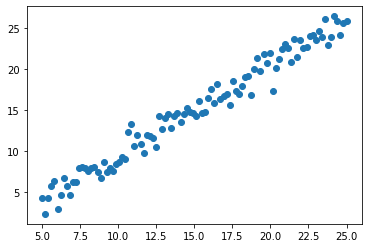

In [5]:
plt.scatter(x, y)

### Оценки корреляции

In [6]:
corr = np.corrcoef(x, y)
r = corr[0][1]
print('r =', r)

r = 0.9857101819098635


связь по шкале Чеддока "весьма высокая"

распределение r есть распределение t-распределение Стьюдента с n-2 степенями свободы 

In [7]:
#t = (r / np.sqrt(1 - r**2)) * np.sqrt(n - 2)
t = abs(r) * np.sqrt((n - 2) / (1 - r**2))
print('t =', t)

t = 57.92832873057542


критическое значение для df = 98, alpha = 0.05 ---- t(кр) = 1.99
следовательно, у нас есть основания отклонить нулевую гипотезу, r не равен нулю

при больших n распределеие r стремится к нормальному
для аппроксимации распределения пользуются преобразованием Фишера

In [8]:
z = 0.5 * np.log((1 + r) / (1 - r))
print(z)

2.4670923207039843


таким образом, доверительный интервал с надежностью 0.95

In [9]:

zl = z - 1.96 * (1 / np.sqrt(n - 3))
zr = z + 1.96 * (1 / np.sqrt(n - 3))

r_l = (np.exp(2 * zl) - 1) / (np.exp(2 * zl) + 1)
r_r = (np.exp(2 * zr) - 1) / (np.exp(2 * zr) + 1)
print('[' + str(r_l) + ' ; ' + str(r_r) + ']')

[0.9787984110007052 ; 0.9903796529323039]


### Модель линейной регрессии

In [10]:
model = LinearRegression()
model.fit(x.reshape((-1, 1)), y)

LinearRegression()

In [11]:
a = model.coef_[0]
b = model.intercept_
print('a =', a, '   b =', b)

a = 1.1052179112509894    b = -1.5770928825508612


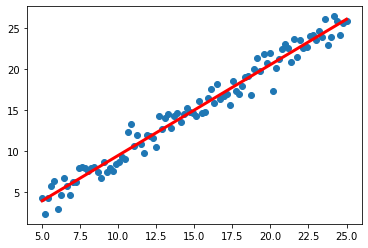

In [12]:
plt.scatter(x, y)
plt.plot(x, x * a + b, color = 'red', linewidth = 3)

### Оценка значимости модели с помощью критерия Фишера

In [13]:
rss = sum((y - x * a + b)**2)
tss = sum((y - np.mean(y))**2)
print('RSS =', rss)
print('TSS =', tss)

RSS = 1116.2010825222897
TSS = 4275.257408423371


In [14]:
Fisher = (rss / (n - 2)) / (tss / (n - 1))
print('F =', Fisher)

F = 0.26374806982736404


критическое значение Фишера = 1.45 следовательно, принимаем 
нулевую гипотезу, модель можно считать адекватной

### Оценка статистической значимоси коэффициентов

In [15]:
S_ad = np.sqrt(rss / (n - 2))
m_a = S_ad / (np.std(x) * np.sqrt(n))
m_b = S_ad * np.sqrt(sum(x**2)) / (n * np.std(x))

In [16]:
T_a = a / m_a
T_b = b / m_b
print("T_a =", T_a)
print("T_b =", T_b)

T_a = 19.097309868101647
T_b = -1.6932692607405004


критическое значение для этой статистики = 1.99 

коэффициент a - значимый, коэффициент b - нет (нет статистической значимости отличия от нуля)

95% доверительный интервал для параметров a и b

In [17]:
a_l = a - 1.99 * m_a
a_r = a + 1.99 * m_a

b_l = b - 1.99 * m_b
b_r = b + 1.99 * m_b

In [18]:
print('Доверительный интервал для a  [' + str(a_l) + ' ; ' + str(a_r) + ']')
print('Доверительный интервал для b  [' + str(b_l) + ' ; ' + str(b_r) + ']')

Доверительный интервал для a  [0.9900507144793063 ; 1.2203851080226726]
Доверительный интервал для b  [-3.4305576025704774 ; 0.2763718374687547]


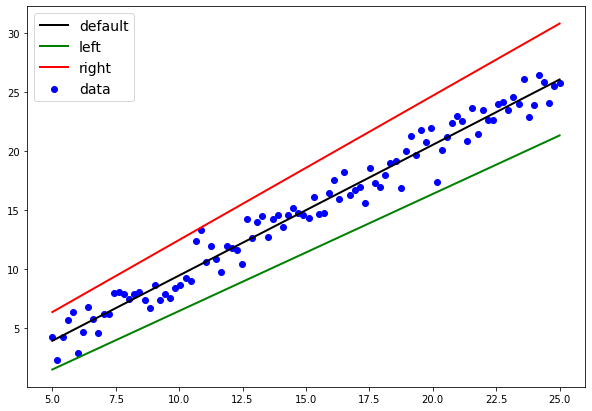

In [19]:
plt.figure(figsize = (10, 7))
plt.scatter(x, y, color = 'blue', label = 'data')
plt.plot(x, a * x + b, color = 'black', linewidth = 2, label = 'default')
plt.plot(x, a_l * x + b_l, color = 'green', linewidth = 2, label = 'left')
plt.plot(x, a_r * x + b_r, color = 'red', linewidth = 2, label = 'right')
plt.legend(fontsize = 14)

### Оценка интервалов прогноза

In [20]:
shag = x[1] - x[0]
x_for_pred = []
temp = x[-1]
for i in range(3):
    temp += shag
    x_for_pred.append(temp)

In [21]:
for i in range(3):
    E = 1.99 * S_ad * np.sqrt(1 + 1 / n + (x_for_pred[i] - np.mean(x))**2 / (n * np.var(x)))
    print('Доверительный интервал для',round(x_for_pred[i], 3),
          ' [' + str(x_for_pred[i] * a + b - E) + ' ; ' + str(x_for_pred[i] * a + b + E) + ']')

Доверительный интервал для 25.202  [19.42562389006482 ; 33.12763859879747]
Доверительный интервал для 25.404  [19.644871810872218 ; 33.35494336940461]
Доверительный интервал для 25.606  [19.86404317892069 ; 33.582324692770676]


# Задание 2

### Тест Чоу

In [22]:
df1 = pd.read_csv('/content/drive/MyDrive/datasets/2.txt',
                  sep = ',',
                  names = ['x1', 'x2', 'x3', 'y'])

Модель на всех признаках

In [23]:
full_x = df1.drop('y', axis = 1)
y = df1['y']

In [24]:
full_model = LinearRegression()
full_model.fit(full_x, y)
full_coef = full_model.coef_
full_intercept = full_model.intercept_
full_rss = sum((y - full_model.predict(full_x)) ** 2)
print('full_rss =', full_rss)

full_rss = 41326.94454871696


Модель на деленном x2

In [25]:
no_x2_0 = df1[df1['x2'] == 0].drop(['x2', 'y'], axis = 1)
no_x2_y_0 = df1[df1['x2'] == 0]['y']
no_x2_1 = df1[df1['x2'] == 1].drop(['x2', 'y'], axis = 1)
no_x2_y_1 = df1[df1['x2'] == 1]['y']

In [26]:
no_x2_0_model = LinearRegression()
no_x2_0_model.fit(no_x2_0, no_x2_y_0 )
no_x2_0_rss = sum((no_x2_y_0 - no_x2_0_model.predict(no_x2_0)) ** 2)
print('no_x2_0_rss =', no_x2_0_rss)

no_x2_0_rss = 662.3564218762082


In [27]:
no_x2_1_model = LinearRegression()
no_x2_1_model.fit(no_x2_1, no_x2_y_1 )
no_x2_1_rss = sum((no_x2_y_1 - no_x2_1_model.predict(no_x2_1)) ** 2)
print('no_x2_0_rss =', no_x2_1_rss)

no_x2_0_rss = 503.13515816050534


In [28]:
F_choy_1 = ((full_rss - no_x2_0_rss - no_x2_1_rss) / 3) / ((no_x2_0_rss + no_x2_1_rss) / 194)
print('F_choy =', F_choy_1)

F_choy = 2228.3363830846774


Критическое значение = 2.65, следовательно принимаем альтернативную гипотезу, и разбиваем выборки

### Оценка параметров моделей

In [29]:
def t_test_regression(model, x, y):
    coef = model.coef_
    inter = model.intercept_
    all_coef = np.hstack((coef, inter))
    ess = sum((y - model.predict(x)) ** 2)
    tss = sum((y - np.mean(y)) ** 2)
    R2 = 1 - ess / tss
    ###
    lm1 = LinearRegression()
    x1 = np.array(x['x1'])
    y1 = x['x3']
    lm1.fit(x1.reshape((-1, 1)), y1)
    pred1 = lm1.predict(x1.reshape((-1, 1)))
    ess1 = sum((y1 - pred1) ** 2)
    tss1 = sum((y1 - np.mean(y1)) ** 2)
    R2_1 = 1 - ess1 / tss1
    ###
    lm2 = LinearRegression()
    x2 = np.array(x['x3'])
    y2 = x['x1']
    lm2.fit(x2.reshape((-1, 1)), y2)
    pred2 = lm2.predict(x2.reshape((-1, 1)))
    ess2 = sum((y2 - pred2) ** 2)
    tss2 = sum((y2 - np.mean(y2)) ** 2)
    R2_2 = 1 - ess2 / tss2

    error1 = (np.std(y) / np.std(x['x1'])) * np.sqrt((1 - R2) / ((1 - R2_2) * (len(y) - 3)))
    error2 = (np.std(y) / np.std(x['x3'])) * np.sqrt((1 - R2) / ((1 - R2_1) * (len(y) - 3)))

    t1 = coef[0] / error1
    t2 = coef[1] / error2
    
    print('критическая точка для t = 1.97')
    print('t-stat for x1 =', t1)
    print('t-stat for x3 =', t2)

оценка параметров первой модели

In [30]:
t_test_regression(no_x2_0_model, no_x2_0, no_x2_y_0)

критическая точка для t = 1.97
t-stat for x1 = -58.11675663481409
t-stat for x3 = -0.2681787529108267


оценка параметров второй модели

In [31]:
t_test_regression(no_x2_1_model, no_x2_1, no_x2_y_1)

критическая точка для t = 1.97
t-stat for x1 = 57.75078915213976
t-stat for x3 = 0.19968237439625022


#Задание 3

In [32]:
df2 = pd.read_csv('/content/drive/MyDrive/datasets/3.txt',
                 sep = ',',
                 names = ['x','y'])

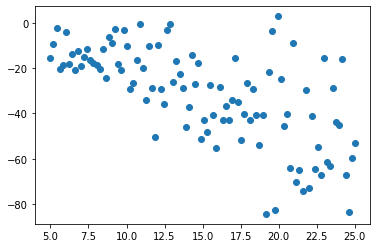

In [33]:
plt.scatter(df2['x'], df2['y'])

### Тест Голдфелда-Квандта

In [38]:
data1 = df2[0:34]

In [39]:
data2 = df2[66:]

In [46]:
m1 = LinearRegression()
m1.fit(np.array(data1['x']).reshape((-1, 1)), data1['y'])
pr1 = m1.predict(np.array(data1['x']).reshape((-1, 1)))
rss1 = sum((np.array(data1['y']) - pr1) ** 2)

In [47]:
m2 = LinearRegression()
m2.fit(np.array(data2['x']).reshape((-1, 1)), data2['y'])
pr2 = m2.predict(np.array(data2['x']).reshape((-1, 1)))
rss2 = sum((np.array(data2['y']) - pr2) ** 2)

In [53]:
if rss1 > rss2:
    Fk = (rss1 / (len(data1) - 1)) / (rss2 / (len(data2) - 1))
else:
    Fk = (rss2 / (len(data2) - 1)) / (rss1 / (len(data1) - 1))

In [55]:
print('Fk =', Fk)

Fk = 8.524289924715236


Критическая точка = 1.60

Следовательно, гетероскедастичность имеет место для заданной линейной зависимости

### Тест Спирмена

In [68]:
def rang(a):
    r = np.array(a.argsort().argsort(), dtype=float)
    f = a==a
    for i in range(len(a)):
      if not f[i]: continue
      s = a == a[i]
      ls = np.sum(s)
      if ls > 1:
          tr = np.sum(r[s])
          r[s] = float(tr)/ls
      f[s] = False
    return r + 1

In [84]:
x = np.array(df2['x'])
y = np.array(df2['y'])
linr = LinearRegression()
linr.fit(x.reshape((-1, 1)), y)
preds = linr.predict(x.reshape((-1, 1)))
errors = y - preds
r_er = rang(errors)
r_x = rang(x)

In [85]:
sm = 0
n = len(r_x)
for i in range(len(r_x)):
    sm += r_er[i] - r_x[i]

final_r = 1 - ((6 * sm) / (n * (n**2 - 1)))
print('sqrt r(e,x) =', final_r * np.sqrt(n - 1) )

sqrt r(e,x) = 9.9498743710662


Критическое значение = 1.96

Следовательно, принимается альтернативная гипотеза, гетероскедастичность признается значимой

### Оценка модели и ее коэффициентов

In [87]:
rss = sum((y - preds) ** 2)
tss = sum((y - np.mean(y)) ** 2)
Fisher = (rss / (n - 2)) / (tss / (n - 1))
print('F =', Fisher)

F = 0.5783282782372539


Критическая точка = 1.26

Следовательно, модель имеет место быть

In [89]:
a = linr.coef_[0]
b = linr.intercept_

In [90]:
S_ad = np.sqrt(rss / (n - 2))
m_a = S_ad / (np.std(x) * np.sqrt(n))
m_b = S_ad * np.sqrt(sum(x**2)) / (n * np.std(x))

In [91]:
T_a = a / m_a
T_b = b / m_b
print("T_a =", T_a)
print('T_b =', T_b)

T_a = -8.55470937395386
T_b = 0.8414767063429153


Критическая точка = 1.99

Следовательно, a значительно отличается от нуля, b - нет